In [11]:
import import_ipynb
import functions as fn
import numpy as np
import pandas as pd
from lstmcontroller import LstmController
from pidcontroller import PidController
import imageio
from sklearn.preprocessing import MinMaxScaler

In [12]:
window = 15
layers = 2
batch_size = 100
drop = 0.1
units = 100
best_feature_threshold = 0.1

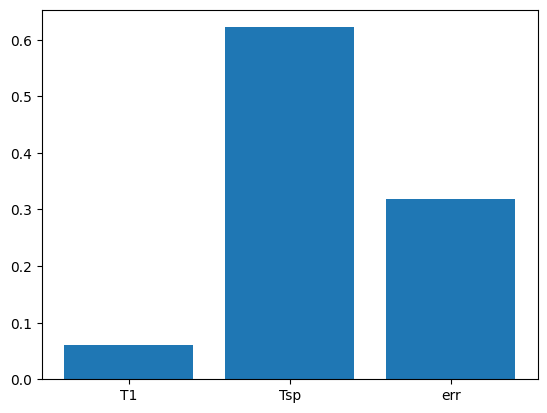

In [13]:
train_data = pd.read_csv('PID_train_data.csv')
train_data['err'] = train_data['Tsp'] - train_data['T1']

y = np.ravel(train_data[['Q1']])
X = train_data[['T1','Tsp','err']]
X = fn.select_best_features(X, y, best_feature_threshold)

In [14]:
s_x = MinMaxScaler()
s_y = MinMaxScaler()
Xtrain, Xtest, ytrain, ytest = fn.create_train_and_test_data(X.values, y.reshape(-1, 1), s_x, s_y, window)
lstm = LstmController(s_x, s_y, Xtrain.shape, layers, window, drop, units)
lstm.train_model(Xtrain, ytrain, batch_size)
lstm.save_model('pid_emulate.h5', 'model_params.pkl')

0epoch [00:00, ?epoch/s]
  0%|                                                                                       | 0/350 [00:00<?, ?epoch/s]
  0%|                                                                                   | 0.00/35.0 [00:00<?, ?batch/s]
  3%|█▊                                                              | 1.00/35.0 [00:15<08:55, 15.7s/batch, loss=0.334]
  6%|███▋                                                            | 2.00/35.0 [00:15<03:38, 6.62s/batch, loss=0.332]
  9%|█████▍                                                          | 3.00/35.0 [00:16<01:58, 3.70s/batch, loss=0.318]
 11%|███████▎                                                        | 4.00/35.0 [00:16<01:12, 2.33s/batch, loss=0.294]
 14%|█████████▏                                                      | 5.00/35.0 [00:16<00:47, 1.57s/batch, loss=0.262]
 17%|██████████▉                                                     | 6.00/35.0 [00:16<00:32, 1.11s/batch, loss=0.227]
 20%|██████████

 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:10<00:02, 2.31batch/s, loss=0.0543]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:10<00:02, 2.27batch/s, loss=0.0543]
 89%|███████████████████████████████████████████████████████▊       | 31.0/35.0 [00:11<00:01, 2.24batch/s, loss=0.0543]
 91%|█████████████████████████████████████████████████████████▌     | 32.0/35.0 [00:11<00:01, 2.22batch/s, loss=0.0544]
 94%|███████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:12<00:00, 2.21batch/s, loss=0.0545]
 97%|█████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:12<00:00, 2.20batch/s, loss=0.0544]
  1%|▎                                              | 2/350 [00:40<1:50:54, 19.12s/epoch, loss=0.0547, val_loss=0.0878]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0547]
  3%|█▊                                 

 66%|██████████████████████████████████████████                      | 23.0/35.0 [00:11<00:05, 2.07batch/s, loss=0.055]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:11<00:05, 2.07batch/s, loss=0.0552]
 71%|█████████████████████████████████████████████▋                  | 25.0/35.0 [00:11<00:04, 2.07batch/s, loss=0.055]
 74%|██████████████████████████████████████████████▊                | 26.0/35.0 [00:12<00:04, 2.07batch/s, loss=0.0548]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:12<00:03, 2.06batch/s, loss=0.0547]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:13<00:03, 2.06batch/s, loss=0.0549]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:13<00:02, 2.06batch/s, loss=0.0551]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:14<00:02, 2.05batch/s, loss=0.0548]
 89%|███████████████████████████████████

 49%|██████████████████████████████▌                                | 17.0/35.0 [00:08<00:09, 1.92batch/s, loss=0.0566]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.92batch/s, loss=0.0564]
 54%|██████████████████████████████████▏                            | 19.0/35.0 [00:09<00:08, 1.93batch/s, loss=0.0557]
 57%|████████████████████████████████████                           | 20.0/35.0 [00:10<00:07, 1.93batch/s, loss=0.0558]
 60%|█████████████████████████████████████▊                         | 21.0/35.0 [00:10<00:07, 1.93batch/s, loss=0.0555]
 63%|███████████████████████████████████████▌                       | 22.0/35.0 [00:11<00:06, 1.93batch/s, loss=0.0554]
 66%|█████████████████████████████████████████▍                     | 23.0/35.0 [00:11<00:06, 1.93batch/s, loss=0.0553]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:12<00:05, 1.91batch/s, loss=0.0552]
 71%|███████████████████████████████████

 31%|███████████████████▊                                           | 11.0/35.0 [00:05<00:12, 1.94batch/s, loss=0.0454]
 34%|█████████████████████▌                                         | 12.0/35.0 [00:06<00:11, 1.94batch/s, loss=0.0441]
 37%|███████████████████████▍                                       | 13.0/35.0 [00:06<00:11, 1.94batch/s, loss=0.0442]
 40%|█████████████████████████▏                                     | 14.0/35.0 [00:07<00:10, 1.94batch/s, loss=0.0431]
 43%|███████████████████████████                                    | 15.0/35.0 [00:07<00:10, 1.93batch/s, loss=0.0431]
 46%|████████████████████████████▊                                  | 16.0/35.0 [00:08<00:09, 1.93batch/s, loss=0.0421]
 49%|██████████████████████████████▌                                | 17.0/35.0 [00:08<00:09, 1.93batch/s, loss=0.0419]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.92batch/s, loss=0.0409]
 54%|██████████████████████████████████▏

 14%|█████████▏                                                      | 5.00/35.0 [00:02<00:15, 1.88batch/s, loss=0.021]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.87batch/s, loss=0.0197]
 20%|████████████▌                                                  | 7.00/35.0 [00:03<00:14, 1.87batch/s, loss=0.0178]
 23%|██████████████▍                                                | 8.00/35.0 [00:04<00:14, 1.88batch/s, loss=0.0179]
 26%|████████████████▍                                               | 9.00/35.0 [00:04<00:13, 1.88batch/s, loss=0.019]
 29%|██████████████████                                             | 10.0/35.0 [00:05<00:13, 1.89batch/s, loss=0.0178]
 31%|███████████████████▊                                           | 11.0/35.0 [00:05<00:12, 1.89batch/s, loss=0.0187]
 34%|█████████████████████▌                                         | 12.0/35.0 [00:06<00:12, 1.89batch/s, loss=0.0187]
 37%|███████████████████████▍           

  3%|█▍                                             | 11/350 [03:24<1:45:16, 18.63s/epoch, loss=0.0139, val_loss=0.016]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0139]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.93batch/s, loss=0.00754]
  6%|███▌                                                           | 2.00/35.0 [00:01<00:17, 1.91batch/s, loss=0.0107]
  9%|█████▍                                                         | 3.00/35.0 [00:01<00:16, 1.92batch/s, loss=0.0121]
 11%|███████▏                                                       | 4.00/35.0 [00:02<00:16, 1.91batch/s, loss=0.0116]
 14%|█████████▏                                                      | 5.00/35.0 [00:02<00:15, 1.92batch/s, loss=0.013]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.91batch/s, loss=0.0172]
 20%|████████████▌                      

 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:15<00:03, 1.90batch/s, loss=0.0153]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:15<00:02, 1.90batch/s, loss=0.0155]
 89%|███████████████████████████████████████████████████████▊       | 31.0/35.0 [00:16<00:02, 1.90batch/s, loss=0.0152]
 91%|█████████████████████████████████████████████████████████▌     | 32.0/35.0 [00:16<00:01, 1.90batch/s, loss=0.0148]
 94%|███████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:17<00:01, 1.90batch/s, loss=0.0147]
 97%|█████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:17<00:00, 1.90batch/s, loss=0.0145]
  4%|█▋                                            | 13/350 [04:02<1:44:58, 18.69s/epoch, loss=0.0146, val_loss=0.0171]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0146]
  3%|█▊                                 

 66%|█████████████████████████████████████████▍                     | 23.0/35.0 [00:12<00:06, 1.90batch/s, loss=0.0118]
 69%|███████████████████████████████████████████▉                    | 24.0/35.0 [00:12<00:05, 1.90batch/s, loss=0.012]
 71%|█████████████████████████████████████████████                  | 25.0/35.0 [00:13<00:05, 1.89batch/s, loss=0.0116]
 74%|██████████████████████████████████████████████▊                | 26.0/35.0 [00:13<00:04, 1.89batch/s, loss=0.0114]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:14<00:04, 1.89batch/s, loss=0.0117]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:14<00:03, 1.90batch/s, loss=0.0116]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:15<00:03, 1.90batch/s, loss=0.0113]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:15<00:02, 1.91batch/s, loss=0.0115]
 89%|███████████████████████████████████

 49%|██████████████████████████████▌                                | 17.0/35.0 [00:09<00:09, 1.86batch/s, loss=0.0105]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:09, 1.86batch/s, loss=0.0107]
 54%|██████████████████████████████████▏                            | 19.0/35.0 [00:10<00:08, 1.87batch/s, loss=0.0109]
 57%|████████████████████████████████████                           | 20.0/35.0 [00:10<00:08, 1.87batch/s, loss=0.0112]
 60%|█████████████████████████████████████▊                         | 21.0/35.0 [00:11<00:07, 1.87batch/s, loss=0.0113]
 63%|███████████████████████████████████████▌                       | 22.0/35.0 [00:11<00:06, 1.87batch/s, loss=0.0113]
 66%|█████████████████████████████████████████▍                     | 23.0/35.0 [00:12<00:06, 1.88batch/s, loss=0.0116]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:12<00:05, 1.87batch/s, loss=0.0116]
 71%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.87batch/s, loss=0.00856]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.88batch/s, loss=0.00841]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.87batch/s, loss=0.00863]
 40%|█████████████████████████▏                                     | 14.0/35.0 [00:07<00:11, 1.88batch/s, loss=0.0085]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.88batch/s, loss=0.00872]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:10, 1.89batch/s, loss=0.00864]
 49%|██████████████████████████████                                | 17.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00847]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00845]
 54%|█████████████████████████████████▋ 

 14%|█████████                                                      | 5.00/35.0 [00:02<00:16, 1.85batch/s, loss=0.0167]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.86batch/s, loss=0.0149]
 20%|████████████▌                                                  | 7.00/35.0 [00:03<00:15, 1.86batch/s, loss=0.0135]
 23%|██████████████▍                                                | 8.00/35.0 [00:04<00:14, 1.86batch/s, loss=0.0131]
 26%|████████████████▏                                              | 9.00/35.0 [00:04<00:13, 1.86batch/s, loss=0.0127]
 29%|██████████████████                                             | 10.0/35.0 [00:05<00:13, 1.87batch/s, loss=0.0126]
 31%|███████████████████▊                                           | 11.0/35.0 [00:05<00:12, 1.87batch/s, loss=0.0126]
 34%|█████████████████████▉                                          | 12.0/35.0 [00:06<00:12, 1.87batch/s, loss=0.012]
 37%|███████████████████████▍           

  6%|██▉                                           | 22/350 [06:53<1:43:40, 18.97s/epoch, loss=0.0082, val_loss=0.0119]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0082]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.91batch/s, loss=0.00932]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.90batch/s, loss=0.00748]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.89batch/s, loss=0.00965]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.90batch/s, loss=0.00871]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:15, 1.90batch/s, loss=0.0082]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.90batch/s, loss=0.00818]
 20%|████████████▍                      

 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.89batch/s, loss=0.00808]
 86%|██████████████████████████████████████████████████████         | 30.0/35.0 [00:15<00:02, 1.89batch/s, loss=0.0083]
 89%|██████████████████████████████████████████████████████▉       | 31.0/35.0 [00:16<00:02, 1.88batch/s, loss=0.00827]
 91%|█████████████████████████████████████████████████████████▌     | 32.0/35.0 [00:16<00:01, 1.88batch/s, loss=0.0082]
 94%|██████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:17<00:01, 1.88batch/s, loss=0.00819]
 97%|████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:17<00:00, 1.88batch/s, loss=0.00811]
  7%|███                                         | 24/350 [07:31<1:42:46, 18.91s/epoch, loss=0.00811, val_loss=0.00784]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00811]
  3%|█▊                                 

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.88batch/s, loss=0.00706]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.88batch/s, loss=0.00701]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:13<00:05, 1.88batch/s, loss=0.00706]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.88batch/s, loss=0.00686]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:14<00:04, 1.88batch/s, loss=0.00734]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:14<00:03, 1.88batch/s, loss=0.00736]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.88batch/s, loss=0.00725]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:16<00:02, 1.88batch/s, loss=0.00735]
 89%|███████████████████████████████████

 49%|██████████████████████████████                                | 17.0/35.0 [00:09<00:09, 1.89batch/s, loss=0.00711]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.89batch/s, loss=0.0069]
 54%|█████████████████████████████████▋                            | 19.0/35.0 [00:10<00:08, 1.89batch/s, loss=0.00738]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:10<00:07, 1.89batch/s, loss=0.00714]
 60%|█████████████████████████████████████▏                        | 21.0/35.0 [00:11<00:07, 1.89batch/s, loss=0.00733]
 63%|███████████████████████████████████████▌                       | 22.0/35.0 [00:11<00:06, 1.89batch/s, loss=0.0071]
 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.89batch/s, loss=0.00719]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.88batch/s, loss=0.00699]
 71%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.89batch/s, loss=0.00737]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.89batch/s, loss=0.00744]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.89batch/s, loss=0.00752]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:11, 1.89batch/s, loss=0.00743]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.89batch/s, loss=0.00742]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:10, 1.89batch/s, loss=0.00751]
 49%|██████████████████████████████                                | 17.0/35.0 [00:09<00:09, 1.89batch/s, loss=0.00724]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:09, 1.88batch/s, loss=0.00753]
 54%|█████████████████████████████████▋ 

 14%|████████▊                                                     | 5.00/35.0 [00:02<00:15, 1.90batch/s, loss=0.00505]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.90batch/s, loss=0.00456]
 20%|████████████▍                                                 | 7.00/35.0 [00:03<00:14, 1.89batch/s, loss=0.00588]
 23%|██████████████▏                                               | 8.00/35.0 [00:04<00:14, 1.89batch/s, loss=0.00539]
 26%|███████████████▉                                              | 9.00/35.0 [00:04<00:13, 1.89batch/s, loss=0.00517]
 29%|█████████████████▋                                            | 10.0/35.0 [00:05<00:13, 1.90batch/s, loss=0.00517]
 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.91batch/s, loss=0.00491]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.91batch/s, loss=0.00468]
 37%|███████████████████████            

  9%|████▏                                       | 33/350 [10:21<1:39:38, 18.86s/epoch, loss=0.00468, val_loss=0.00655]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00468]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:17, 1.91batch/s, loss=0.00963]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.93batch/s, loss=0.00761]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.92batch/s, loss=0.00816]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.91batch/s, loss=0.00768]
 14%|████████▊                                                     | 5.00/35.0 [00:02<00:15, 1.91batch/s, loss=0.00726]
 17%|██████████▊                                                    | 6.00/35.0 [00:03<00:15, 1.91batch/s, loss=0.0075]
 20%|████████████▍                      

 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.91batch/s, loss=0.00546]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.90batch/s, loss=0.00541]
 89%|███████████████████████████████████████████████████████▊       | 31.0/35.0 [00:16<00:02, 1.90batch/s, loss=0.0053]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:16<00:01, 1.90batch/s, loss=0.00546]
 94%|██████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:17<00:01, 1.90batch/s, loss=0.00534]
 97%|█████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:17<00:00, 1.90batch/s, loss=0.0054]
 10%|████▍                                       | 35/350 [10:58<1:38:28, 18.76s/epoch, loss=0.00537, val_loss=0.00521]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00537]
  3%|█▊                                 

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.90batch/s, loss=0.00458]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.90batch/s, loss=0.00461]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:13<00:05, 1.90batch/s, loss=0.00451]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.90batch/s, loss=0.00448]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:14<00:04, 1.90batch/s, loss=0.00471]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:14<00:03, 1.90batch/s, loss=0.00465]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:15<00:03, 1.91batch/s, loss=0.00463]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.91batch/s, loss=0.00452]
 89%|███████████████████████████████████

 49%|██████████████████████████████▌                                | 17.0/35.0 [00:08<00:09, 1.88batch/s, loss=0.0041]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:09, 1.89batch/s, loss=0.00429]
 54%|█████████████████████████████████▋                            | 19.0/35.0 [00:10<00:08, 1.89batch/s, loss=0.00421]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:10<00:07, 1.89batch/s, loss=0.00417]
 60%|█████████████████████████████████████▏                        | 21.0/35.0 [00:11<00:07, 1.90batch/s, loss=0.00407]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:11<00:06, 1.90batch/s, loss=0.00399]
 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:12<00:06, 1.90batch/s, loss=0.00406]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.91batch/s, loss=0.00402]
 71%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.87batch/s, loss=0.00408]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.88batch/s, loss=0.00391]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:11, 1.89batch/s, loss=0.00378]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:11, 1.90batch/s, loss=0.00366]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.90batch/s, loss=0.00357]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:09, 1.90batch/s, loss=0.00372]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 1.90batch/s, loss=0.00357]
 51%|████████████████████████████████▍                              | 18.0/35.0 [00:09<00:08, 1.91batch/s, loss=0.0035]
 54%|██████████████████████████████████▏

 14%|█████████                                                      | 5.00/35.0 [00:02<00:16, 1.85batch/s, loss=0.0046]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.84batch/s, loss=0.00481]
 20%|████████████▌                                                  | 7.00/35.0 [00:03<00:15, 1.84batch/s, loss=0.0048]
 23%|██████████████▏                                               | 8.00/35.0 [00:04<00:14, 1.84batch/s, loss=0.00441]
 26%|███████████████▉                                              | 9.00/35.0 [00:04<00:14, 1.84batch/s, loss=0.00429]
 29%|█████████████████▋                                            | 10.0/35.0 [00:05<00:13, 1.85batch/s, loss=0.00439]
 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 1.85batch/s, loss=0.00492]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:06<00:12, 1.85batch/s, loss=0.00492]
 37%|███████████████████████            

 13%|█████▋                                       | 44/350 [13:48<1:36:55, 19.00s/epoch, loss=0.0037, val_loss=0.00518]
  0%|                                                                      | 0.00/35.0 [00:00<?, ?batch/s, loss=0.0037]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:18, 1.89batch/s, loss=0.00735]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:17, 1.88batch/s, loss=0.00423]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:17, 1.87batch/s, loss=0.00333]
 11%|███████                                                       | 4.00/35.0 [00:02<00:16, 1.86batch/s, loss=0.00304]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:16, 1.86batch/s, loss=0.0027]
 17%|██████████▋                                                   | 6.00/35.0 [00:03<00:15, 1.87batch/s, loss=0.00258]
 20%|████████████▍                      

 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:14<00:03, 1.95batch/s, loss=0.00369]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.95batch/s, loss=0.00364]
 89%|██████████████████████████████████████████████████████▉       | 31.0/35.0 [00:15<00:02, 1.96batch/s, loss=0.00377]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:16<00:01, 1.97batch/s, loss=0.00374]
 94%|███████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:16<00:01, 1.96batch/s, loss=0.0038]
 97%|████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:17<00:00, 1.95batch/s, loss=0.00379]
 13%|█████▊                                      | 46/350 [14:26<1:35:00, 18.75s/epoch, loss=0.00376, val_loss=0.00301]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00376]
  3%|█▊                                 

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 1.92batch/s, loss=0.00515]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.92batch/s, loss=0.00509]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:12<00:05, 1.92batch/s, loss=0.00503]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:13<00:04, 1.92batch/s, loss=0.00504]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:13<00:04, 1.92batch/s, loss=0.00495]
 80%|██████████████████████████████████████████████████▍            | 28.0/35.0 [00:14<00:03, 1.93batch/s, loss=0.0049]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:14<00:03, 1.93batch/s, loss=0.0049]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.93batch/s, loss=0.00477]
 89%|███████████████████████████████████

 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 1.99batch/s, loss=0.00267]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:08, 1.99batch/s, loss=0.00265]
 54%|█████████████████████████████████▋                            | 19.0/35.0 [00:09<00:08, 1.98batch/s, loss=0.00286]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:10<00:07, 1.97batch/s, loss=0.00284]
 60%|█████████████████████████████████████▏                        | 21.0/35.0 [00:10<00:07, 1.97batch/s, loss=0.00306]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:11<00:06, 1.97batch/s, loss=0.00296]
 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 1.97batch/s, loss=0.00332]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 1.97batch/s, loss=0.00338]
 71%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:11, 2.02batch/s, loss=0.00315]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:05<00:11, 2.03batch/s, loss=0.00325]
 37%|███████████████████████                                       | 13.0/35.0 [00:06<00:10, 2.03batch/s, loss=0.00309]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:06<00:10, 2.02batch/s, loss=0.00313]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:09, 2.02batch/s, loss=0.00358]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:07<00:09, 2.02batch/s, loss=0.00352]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:08, 2.02batch/s, loss=0.00342]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:08<00:08, 2.02batch/s, loss=0.00353]
 54%|█████████████████████████████████▋ 

 14%|████████▊                                                     | 5.00/35.0 [00:02<00:14, 2.00batch/s, loss=0.00141]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.00batch/s, loss=0.00225]
 20%|████████████▍                                                 | 7.00/35.0 [00:03<00:13, 2.01batch/s, loss=0.00349]
 23%|██████████████▏                                               | 8.00/35.0 [00:03<00:13, 2.00batch/s, loss=0.00332]
 26%|███████████████▉                                              | 9.00/35.0 [00:04<00:12, 2.00batch/s, loss=0.00325]
 29%|█████████████████▋                                            | 10.0/35.0 [00:04<00:12, 2.00batch/s, loss=0.00331]
 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00324]
 34%|█████████████████████▌                                         | 12.0/35.0 [00:05<00:11, 2.01batch/s, loss=0.0031]
 37%|███████████████████████            

 16%|██████▉                                     | 55/350 [17:07<1:27:54, 17.88s/epoch, loss=0.00298, val_loss=0.00454]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00298]
  3%|█▊                                                            | 1.00/35.0 [00:00<00:16, 2.01batch/s, loss=0.00189]
  6%|███▌                                                          | 2.00/35.0 [00:01<00:16, 2.00batch/s, loss=0.00229]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:16, 1.98batch/s, loss=0.00402]
 11%|███████                                                       | 4.00/35.0 [00:02<00:15, 1.99batch/s, loss=0.00505]
 14%|█████████                                                      | 5.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.0046]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00433]
 20%|████████████▍                      

 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:14<00:02, 2.01batch/s, loss=0.00283]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:14<00:02, 2.00batch/s, loss=0.00277]
 89%|██████████████████████████████████████████████████████▉       | 31.0/35.0 [00:15<00:01, 2.01batch/s, loss=0.00274]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:15<00:01, 2.01batch/s, loss=0.00269]
 94%|██████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:16<00:00, 2.00batch/s, loss=0.00293]
 97%|████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:16<00:00, 1.99batch/s, loss=0.00291]
 16%|███████▎                                     | 57/350 [17:43<1:27:13, 17.86s/epoch, loss=0.00289, val_loss=0.0034]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00289]
  3%|█▊                                 

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 1.99batch/s, loss=0.00254]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:11<00:05, 2.00batch/s, loss=0.00247]
 71%|█████████████████████████████████████████████                  | 25.0/35.0 [00:12<00:04, 2.00batch/s, loss=0.0025]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:12<00:04, 2.00batch/s, loss=0.00245]
 77%|████████████████████████████████████████████████▌              | 27.0/35.0 [00:13<00:03, 2.00batch/s, loss=0.0026]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:13<00:03, 2.00batch/s, loss=0.00254]
 83%|████████████████████████████████████████████████████▏          | 29.0/35.0 [00:14<00:03, 1.99batch/s, loss=0.0028]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:15<00:02, 1.99batch/s, loss=0.00273]
 89%|███████████████████████████████████

 49%|██████████████████████████████▌                                | 17.0/35.0 [00:08<00:09, 2.00batch/s, loss=0.0031]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:08<00:08, 2.00batch/s, loss=0.00306]
 54%|█████████████████████████████████▋                            | 19.0/35.0 [00:09<00:07, 2.00batch/s, loss=0.00298]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:09<00:07, 2.01batch/s, loss=0.00291]
 60%|█████████████████████████████████████▏                        | 21.0/35.0 [00:10<00:06, 2.01batch/s, loss=0.00282]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:10<00:06, 2.01batch/s, loss=0.00275]
 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:06, 2.00batch/s, loss=0.00269]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:11<00:05, 2.00batch/s, loss=0.00282]
 71%|███████████████████████████████████

 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00335]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00333]
 37%|███████████████████████▍                                       | 13.0/35.0 [00:06<00:11, 2.00batch/s, loss=0.0032]
 40%|████████████████████████▊                                     | 14.0/35.0 [00:07<00:10, 2.00batch/s, loss=0.00307]
 43%|██████████████████████████▌                                   | 15.0/35.0 [00:07<00:10, 1.99batch/s, loss=0.00292]
 46%|████████████████████████████▎                                 | 16.0/35.0 [00:08<00:09, 2.00batch/s, loss=0.00289]
 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 2.00batch/s, loss=0.00279]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:08, 2.00batch/s, loss=0.00268]
 54%|██████████████████████████████████▏

 14%|████████▊                                                     | 5.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00232]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.02batch/s, loss=0.00215]
 20%|████████████▍                                                 | 7.00/35.0 [00:03<00:13, 2.01batch/s, loss=0.00196]
 23%|██████████████▏                                               | 8.00/35.0 [00:03<00:13, 2.00batch/s, loss=0.00197]
 26%|███████████████▉                                              | 9.00/35.0 [00:04<00:13, 2.00batch/s, loss=0.00204]
 29%|█████████████████▋                                            | 10.0/35.0 [00:04<00:12, 2.00batch/s, loss=0.00228]
 31%|███████████████████▍                                          | 11.0/35.0 [00:05<00:12, 2.00batch/s, loss=0.00323]
 34%|█████████████████████▎                                        | 12.0/35.0 [00:05<00:11, 2.00batch/s, loss=0.00321]
 37%|███████████████████████▍           

 19%|████████▎                                   | 66/350 [20:24<1:24:23, 17.83s/epoch, loss=0.00255, val_loss=0.00483]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00255]
  3%|█▋                                                           | 1.00/35.0 [00:00<00:16, 2.00batch/s, loss=0.000921]
  6%|███▌                                                          | 2.00/35.0 [00:00<00:16, 2.00batch/s, loss=0.00159]
  9%|█████▎                                                        | 3.00/35.0 [00:01<00:15, 2.01batch/s, loss=0.00352]
 11%|███████                                                       | 4.00/35.0 [00:01<00:15, 2.00batch/s, loss=0.00501]
 14%|████████▊                                                     | 5.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00423]
 17%|██████████▋                                                   | 6.00/35.0 [00:02<00:14, 2.01batch/s, loss=0.00381]
 20%|████████████▍                      

 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:14<00:03, 2.00batch/s, loss=0.00222]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:14<00:02, 2.00batch/s, loss=0.00225]
 89%|██████████████████████████████████████████████████████▉       | 31.0/35.0 [00:15<00:01, 2.00batch/s, loss=0.00221]
 91%|████████████████████████████████████████████████████████▋     | 32.0/35.0 [00:15<00:01, 2.01batch/s, loss=0.00232]
 94%|██████████████████████████████████████████████████████████▍   | 33.0/35.0 [00:16<00:00, 2.01batch/s, loss=0.00231]
 97%|████████████████████████████████████████████████████████████▏ | 34.0/35.0 [00:16<00:00, 2.01batch/s, loss=0.00228]
 19%|████████▌                                   | 68/350 [20:59<1:23:38, 17.79s/epoch, loss=0.00227, val_loss=0.00303]
  0%|                                                                     | 0.00/35.0 [00:00<?, ?batch/s, loss=0.00227]
  3%|█▊                                 

 66%|████████████████████████████████████████▋                     | 23.0/35.0 [00:11<00:05, 2.02batch/s, loss=0.00208]
 69%|███████████████████████████████████████████▏                   | 24.0/35.0 [00:11<00:05, 2.02batch/s, loss=0.0021]
 71%|████████████████████████████████████████████▎                 | 25.0/35.0 [00:12<00:04, 2.02batch/s, loss=0.00207]
 74%|██████████████████████████████████████████████                | 26.0/35.0 [00:12<00:04, 2.02batch/s, loss=0.00228]
 77%|███████████████████████████████████████████████▊              | 27.0/35.0 [00:13<00:03, 2.02batch/s, loss=0.00223]
 80%|█████████████████████████████████████████████████▌            | 28.0/35.0 [00:13<00:03, 2.02batch/s, loss=0.00219]
 83%|███████████████████████████████████████████████████▎          | 29.0/35.0 [00:14<00:02, 2.02batch/s, loss=0.00217]
 86%|█████████████████████████████████████████████████████▏        | 30.0/35.0 [00:14<00:02, 2.01batch/s, loss=0.00217]
 89%|███████████████████████████████████

 49%|██████████████████████████████                                | 17.0/35.0 [00:08<00:09, 1.98batch/s, loss=0.00287]
 51%|███████████████████████████████▉                              | 18.0/35.0 [00:09<00:08, 1.98batch/s, loss=0.00279]
 54%|█████████████████████████████████▋                            | 19.0/35.0 [00:09<00:08, 1.99batch/s, loss=0.00277]
 57%|███████████████████████████████████▍                          | 20.0/35.0 [00:10<00:07, 2.00batch/s, loss=0.00267]
 60%|█████████████████████████████████████▏                        | 21.0/35.0 [00:10<00:06, 2.01batch/s, loss=0.00261]
 63%|██████████████████████████████████████▉                       | 22.0/35.0 [00:11<00:06, 2.01batch/s, loss=0.00257]
 66%|█████████████████████████████████████████▍                     | 23.0/35.0 [00:11<00:05, 2.00batch/s, loss=0.0025]
 69%|██████████████████████████████████████████▌                   | 24.0/35.0 [00:12<00:05, 2.00batch/s, loss=0.00244]
 71%|███████████████████████████████████

In [15]:
yp = lstm.predict(Xtest)

Xtest_us = lstm.s_x.inverse_transform(Xtest[:,-1,:])
ytest_us = lstm.s_y.inverse_transform(ytest)

sp = Xtest_us[:,0]
pv = Xtest_us[:,0] + Xtest_us[:,1]

fn.multiplot({
    '$SP$ $(^oC)$': sp,
    '$T_1$ $(^oC)$': pv,
    '$Q_{PID}$ (%)': ytest_us,
    '$Q_{LSTM}$ (%)': yp
}, 'Time', 'Value')

In [16]:
Kc   = 6.0
tauI = 75.0 # sec
tauD = 0.0  # sec
out_min = 0
out_max = 100
pid = PidController(Kc, Kc / tauI, -Kc * tauD, out_min, out_max)

In [20]:
lstm = LstmController.load_model('pid_emulate.h5', 'model_params.pkl')

run_time = 90 * 60

Tsp = fn.generate_temperature_setpoints(lstm.window + 15, 23.67, 240, 600, 30, 70, run_time)

lstm.temp_history = 14 * [Tsp[0]]
lstm.err_history = 14 * [0]

In [21]:
tm, T1, Qpid, Qlstm = fn.run_tclab(run_time, Tsp, pid, passive_cont=lstm, emulator=True, speedup=60)
gif_time_step = 10
fn.make_image_history('./figures/pid_{}.png', len(tm), gif_time_step, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{PID}$ (%)': Qpid,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/pid_{}.png', len(tm), 10)
imageio.mimsave('pid_controller.gif', images)

In [ ]:
tm, T1, Qlstm, Qpid = fn.run_tclab(run_time, Tsp, lstm, emulator=True, speedup=60)
fn.make_image_history('./figures/lstm_{}.png', len(tm), 10, {
    'SP $(^oC)$': Tsp,
    '$T_1$ $(^oC)$': T1,
    '$Q_{LSTM}$ (%)': Qlstm
})
images = fn.read_image_history('./figures/lstm_{}.png', len(tm), 10)
imageio.mimsave('lstm_controller.gif', images)